## Load Data

In [ ]:
# fashion_mnist
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Reshape Data

In [ ]:
X_train = X_train.reshape(60000, -1)
X_test  = X_test.reshape(10000, -1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


## ADAM

In [ ]:
# Better optimizer

initializer = tf.keras.initializers.RandomNormal()

# create model
model = keras.Sequential()
model.add(keras.Input(shape=(784,)))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(10))


# optimizer and loss
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

# training
batch_size = 512
history = model.fit(X_train, y_train, batch_size,
                    validation_data=(X_test, y_test),
                    epochs=300, verbose=2)
# 118/118 - 1s - loss: 0.4066 - accuracy: 0.8558 - val_loss: 0.4638 - val_accuracy: 0.8395 - 515ms/epoch - 4ms/step


Epoch 1/300
118/118 - 6s - loss: 1.9897 - accuracy: 0.1942 - val_loss: 1.5503 - val_accuracy: 0.3004 - 6s/epoch - 51ms/step
Epoch 2/300
118/118 - 0s - loss: 1.3262 - accuracy: 0.4017 - val_loss: 1.1822 - val_accuracy: 0.4405 - 494ms/epoch - 4ms/step
Epoch 3/300
118/118 - 0s - loss: 1.1081 - accuracy: 0.4846 - val_loss: 1.0918 - val_accuracy: 0.5264 - 474ms/epoch - 4ms/step
Epoch 4/300
118/118 - 0s - loss: 0.9955 - accuracy: 0.5962 - val_loss: 0.9356 - val_accuracy: 0.6406 - 494ms/epoch - 4ms/step
Epoch 5/300
118/118 - 0s - loss: 0.8964 - accuracy: 0.6522 - val_loss: 0.8748 - val_accuracy: 0.6586 - 473ms/epoch - 4ms/step
Epoch 6/300
118/118 - 1s - loss: 0.8546 - accuracy: 0.6747 - val_loss: 0.8418 - val_accuracy: 0.6678 - 509ms/epoch - 4ms/step
Epoch 7/300
118/118 - 0s - loss: 0.8177 - accuracy: 0.6825 - val_loss: 0.8275 - val_accuracy: 0.6760 - 467ms/epoch - 4ms/step
Epoch 8/300
118/118 - 0s - loss: 0.7901 - accuracy: 0.7003 - val_loss: 0.8214 - val_accuracy: 0.6745 - 459ms/epoch - 4ms

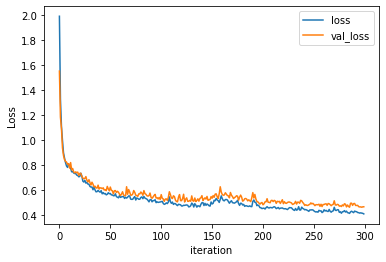

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

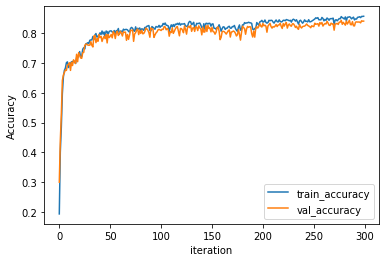

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()